In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=300,
    n_features=2,
    centers=2,
    cluster_std=1.0,random_state=101)

In [4]:
X,y = data

In [5]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [6]:
feat = pd.DataFrame(X)
feat = pd.concat([feat,z_noise],axis=1)
feat.columns = ['X1','X2','X3']

In [7]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


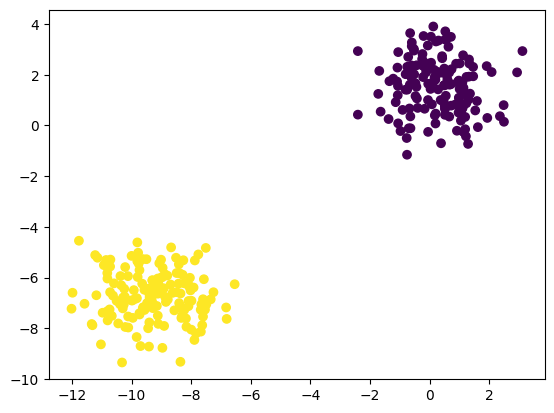

In [8]:
plt.scatter(feat['X1'],feat['X2'],c=y)

In [9]:
from mpl_toolkits.mplot3d import Axes3D

In [10]:
# %matplotlib notebook

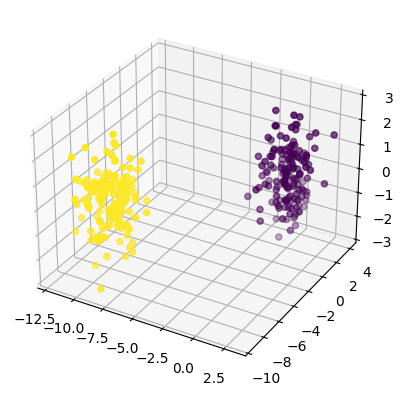

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

# Encoder and Decoder

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [13]:
# 3 --> 2
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

In [14]:
# 2 ---> 3
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [15]:
# ENCODER
# 3 ---> 2 ----> 3
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(lr=1.5))

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
# Note how all the data is used! There is no "right" answer here
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [18]:
# scaled_data

In [19]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5
10/10 [==============================] - 1s 4ms/step - loss: 0.2149
Epoch 2/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1895
Epoch 3/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1747
Epoch 4/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1660
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1601


In [20]:
encoded_2dim = encoder.predict(scaled_data)

10/10 [==============================] - 0s 2ms/step


In [21]:
encoded_2dim

array([[1.56771392e-01, 7.50559092e-01],
       [3.65770370e-01, 1.02762711e+00],
       [3.77110690e-01, 1.03386974e+00],
       [1.09844469e-02, 4.54783946e-01],
       [1.12186447e-01, 4.34214622e-01],
       [1.53847903e-01, 3.71513188e-01],
       [2.00955480e-01, 7.67302036e-01],
       [1.05825827e-01, 4.48697597e-01],
       [3.22816730e-01, 7.05318570e-01],
       [3.36483151e-01, 1.00063872e+00],
       [1.78999215e-01, 5.12015820e-01],
       [1.13706648e-01, 3.01451445e-01],
       [3.68861735e-01, 9.81154084e-01],
       [3.95241342e-02, 3.38206291e-01],
       [2.04824090e-01, 7.66455293e-01],
       [6.87244385e-02, 5.55566728e-01],
       [3.44417304e-01, 9.18562829e-01],
       [3.34067851e-01, 1.14512646e+00],
       [3.70469332e-01, 1.18214297e+00],
       [2.05072850e-01, 9.32190478e-01],
       [1.26698092e-01, 4.21633035e-01],
       [4.10422891e-01, 1.14485538e+00],
       [3.17038149e-01, 7.51305521e-01],
       [6.97497651e-03, 2.37665266e-01],
       [7.752180

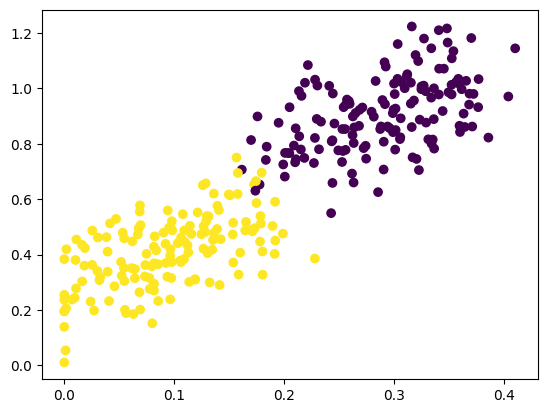

In [22]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)